# Dermatologist AI - Data Exploration

- Getting a sence of the different classes by looking at the images

In [27]:
# load libraries

import numpy as np

from glob import glob
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [2]:
# tell PIL is OK to load big files
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
# set data directory path
data_dir = "data/"

## Utility functions

In [31]:
def display_images_from_paths(img_paths, subplot_number = 2, labels = [], title = ''):
    #pl.subplots_adjust(hspace = 0.4)
    
    fig = plt.figure(figsize=(25, 8))
    total_images = len(img_paths) + (len(img_paths) % 2) # add 1 to an odd len
     
    for idx, path in enumerate(img_paths):        
        img = plt.imread(path)
        ax = fig.add_subplot(subplot_number, total_images / subplot_number, idx+1, xticks=[], yticks=[])
        if len(labels) > 0:
            ax.set_title(labels[idx])
        ax.set_title(title)
        plt.imshow(img)

## Load data
Data achronyms:
- melanoma: mm - malignant melanoma
- nevus: ncn - nevocellular nevus
- seborrheic keratosis: sk


In [5]:
# load training set image paths
train_paths = {}
train_paths['mm'] = np.array(glob("data/train/melanoma/*"))
train_paths['sk'] = np.array(glob("data/train/seborrheic_keratosis/*"))
train_paths['ncn'] = np.array(glob("data/train/nevus/*"))

In [6]:
# How many images?
print("there are {} total images of melanoma".format(len(train_paths['mm'])))
print("there are {} total images of seborrheic keratosis".format(len(train_paths['sk'])))
print("there are {} total images of nevocellular nevus".format(len(train_paths['ncn'])))

there are 374 total images of melanoma
there are 254 total images of seborrheic keratosis
there are 1372 total images of nevocellular nevus


training data distribution:

In [7]:
def show_data_distribution(data, title = ''):
    
    fig, ax = plt.subplots()
    ind = np.arange(1, 4)
    
    # calculate the bar values
    total_data = len(data['mm']) + len(data['sk']) + len(data['ncn'])
    values = [(100 * len(data['mm']) / total_data, 'r'), 
              (100 * len(data['sk']) / total_data, 'xkcd:lightblue'), 
              (100 * len(data['ncn']) / total_data, 'xkcd:lightblue')
             ]
    
    # create the bars
    for i, (value, color) in enumerate(values):
        plt.bar(i + 1, value, color = color)
    
    # set bars' data labels
    rects = ax.patches
    for rect, value in zip(rects, values):
        ax.text(rect.get_x() + rect.get_width() / 2, 
                rect.get_height() + 5, 
                '{:.2f}%'.format(value[0]), 
                ha = 'center', 
                va = 'bottom'
               )
    
    # set plt labels
    ax.set_xticks(ind)
    ax.set_xticklabels(['melanoma\n{}'.format(len(data['mm'])), 
                        'seborrheic keratosis\n{}'.format(len(data['sk'])), 
                        'nevus\n{}'.format(len(data['ncn']))
                       ])
    ax.set_ylim([0, 100])
    ax.set_ylabel('percent of total')
    ax.set_title(title)
    
    plt.show()
    


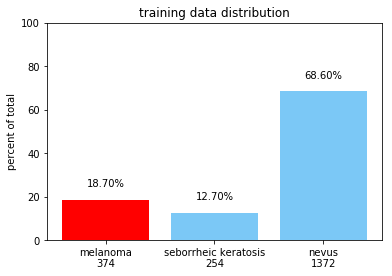

In [8]:
show_data_distribution(train_paths, 'training data distribution')

A network will be difficult to train with this data inbalance.  let's see what test and validation data look like

In [9]:
# load validation set image paths
valid_paths = {}
valid_paths['mm'] = np.array(glob("data/valid/melanoma/*"))
valid_paths['sk'] = np.array(glob("data/valid/seborrheic_keratosis/*"))
valid_paths['ncn'] = np.array(glob("data/valid/nevus/*"))

In [10]:
# load test set image paths
test_paths = {}
test_paths['mm'] = np.array(glob("data/test/melanoma/*"))
test_paths['sk'] = np.array(glob("data/test/seborrheic_keratosis/*"))
test_paths['ncn'] = np.array(glob("data/test/nevus/*"))

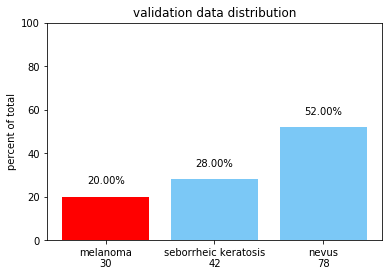

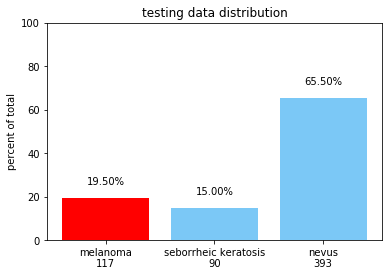

In [11]:
show_data_distribution(valid_paths, 'validation data distribution')
show_data_distribution(test_paths, 'testing data distribution')

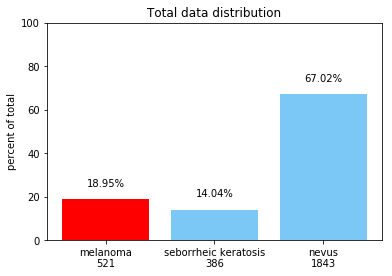

In [12]:
# total data
all_data_paths = {}
all_data_paths['mm'] = np.concatenate((train_paths['mm'], valid_paths['mm'], test_paths['mm']), axis = 0)
all_data_paths['sk'] = np.concatenate((train_paths['sk'], valid_paths['sk'], test_paths['sk']), axis = 0)
all_data_paths['ncn'] = np.concatenate((train_paths['ncn'], valid_paths['ncn'], test_paths['ncn']), axis = 0)

show_data_distribution(all_data_paths, 'Total data distribution')

let's print some examples

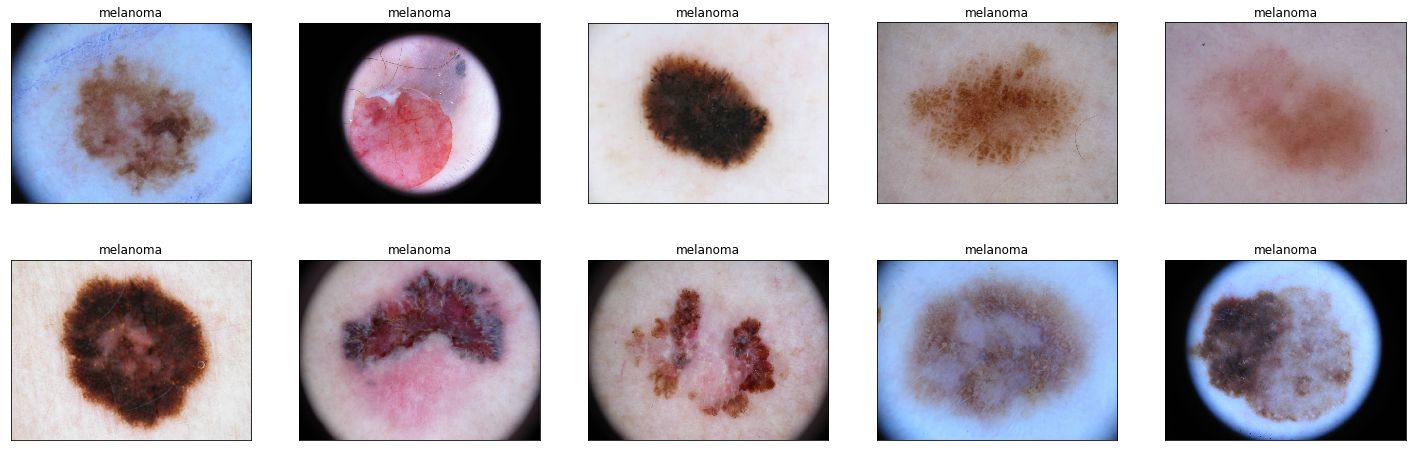

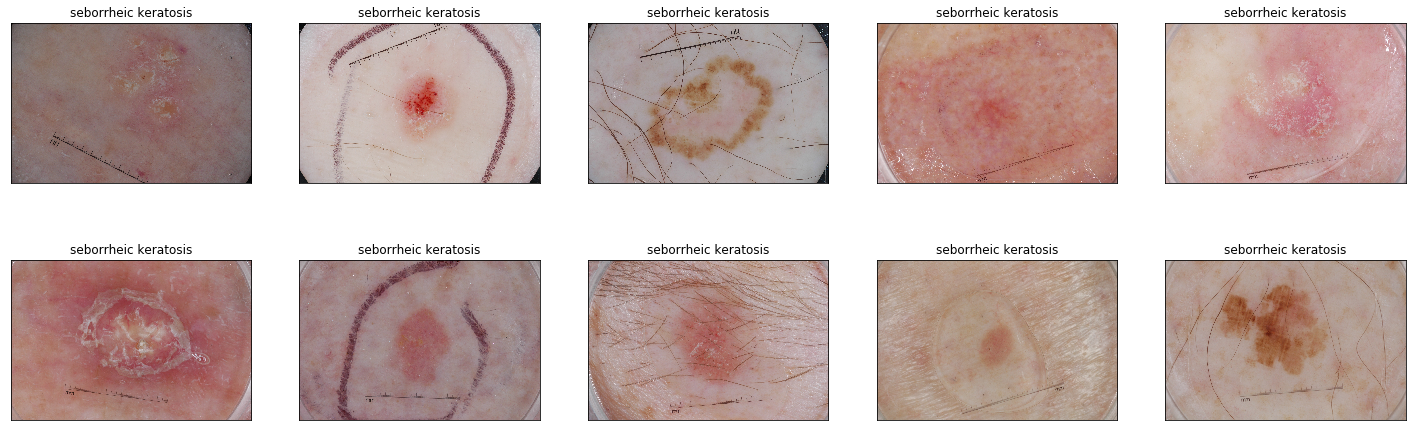

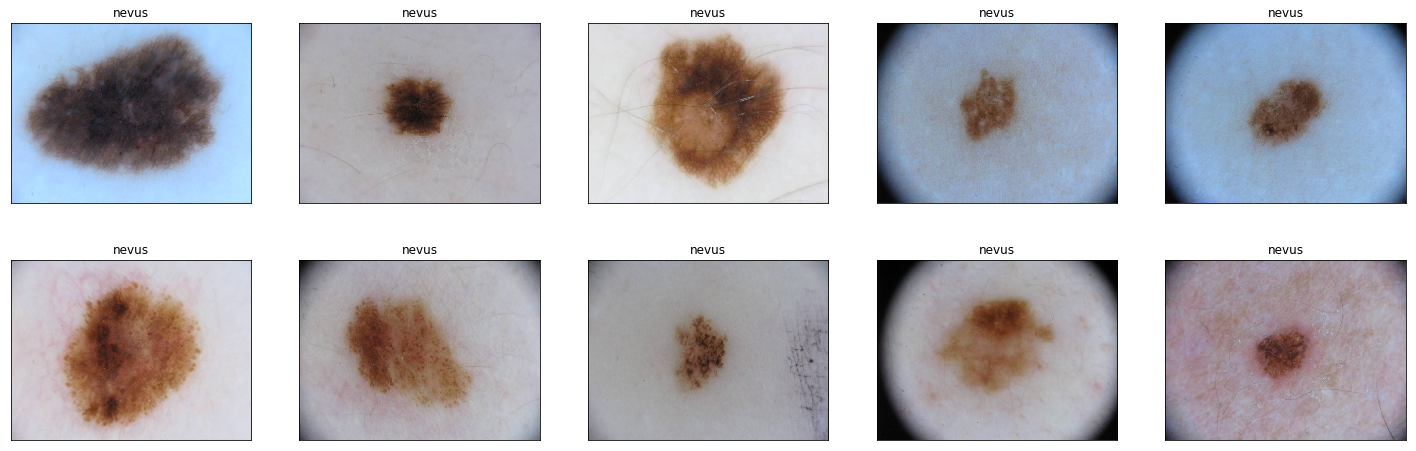

In [33]:
display_images_from_paths(train_paths['mm'][:10], title = 'melanoma')
display_images_from_paths(train_paths['sk'][:10], title = 'seborrheic keratosis')
display_images_from_paths(train_paths['ncn'][:10], title = 'nevus')